# Weight Tracking 

## for better workout results

***

## Imports

In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib
%matplotlib inline

## Data Manipulation

### Load data into a pandas dataframe

** WARNING:** All data is _simulated data_ &rarr; not real 

In [46]:
df = pd.read_csv('.\weight_data.csv', parse_dates=['Date'], index_col = ['Date'])
df.head()

,Weight,Training
Date,,
2020-11-24,66.6,y
2020-11-25,67.2,y
2020-11-26,66.9,n
2020-11-27,66.5,y
2020-11-28,66.6,y


### Compute daily weight difference

Difference is computed as   Weight_day2 - Weight_day1.

Positive differences mean weight gain, negative differences mean weight loss. 

In [44]:
df['Diff'] = df['Weight'].diff(periods = 1)
df['Diff'] = df['Diff'].fillna(0)

### Quick look at the data

In [39]:
print(df.describe(include=np.number))
print('\n')
print(df.describe(include=[object]))

          Weight       Diff
count  74.000000  74.000000
mean   68.406757   0.043243
std     1.175589   0.342865
min    66.300000  -0.800000
25%    67.300000  -0.275000
50%    68.800000   0.100000
75%    69.300000   0.300000
max    70.500000   0.800000


       Training
count        74
unique        2
top           y
freq         52


### Split data into training days and non-training days

In [41]:
df_y = df[df['Training'].str.contains('y')]
df_n = df[df['Training'].str.contains('n')]

In [42]:
print(df_y.head())
print('\n')
print(df_n.head())

            Weight Training  Diff
Date                             
2020-11-24    66.6        y   0.0
2020-11-25    67.2        y   0.6
2020-11-27    66.5        y  -0.4
2020-11-28    66.6        y   0.1
2020-11-29    66.9        y   0.3


            Weight Training  Diff
Date                             
2020-11-26    66.9        n  -0.3
2020-12-01    67.2        n  -0.1
2020-12-03    67.8        n   0.3
2020-12-07    67.1        n   0.3
2020-12-08    66.9        n  -0.2


## Data Visualization

### Weight trend

In [84]:
def weight_trend_settings(df, ax):

    ax.tick_params(axis = 'x', which = 'major', labelsize = 18, direction = 'out', length = 7, rotation = 15)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 18, direction = 'out', length = 7)
    ax.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'out', length = 3)
    ax.tick_params(axis = 'x', which = 'minor', bottom = False)
    ax.set_yticks(ticks = ax.get_yticks(), minor = True)
    ax.minorticks_on()

    ax.set_xlabel('Date', fontsize = 0, loc = 'center')
    ax.set_ylabel('Weight (kg)', fontsize = 24, loc = 'center', labelpad = 15)
    ax.set_title('Weight trend', fontsize = 32)

    date_form = DateFormatter("%d %b")
    ax.xaxis.set_major_formatter(date_form)

    MAX = df['Weight'].max() + 0.5 
    MIN = df['Weight'].min() - 0.5 

    ax.set_ylim(bottom = MIN, top = MAX)

    ax.legend(loc = 'lower right', prop = {'size': 20}, ncol = 1, frameon = True, fancybox = True, framealpha = 1)

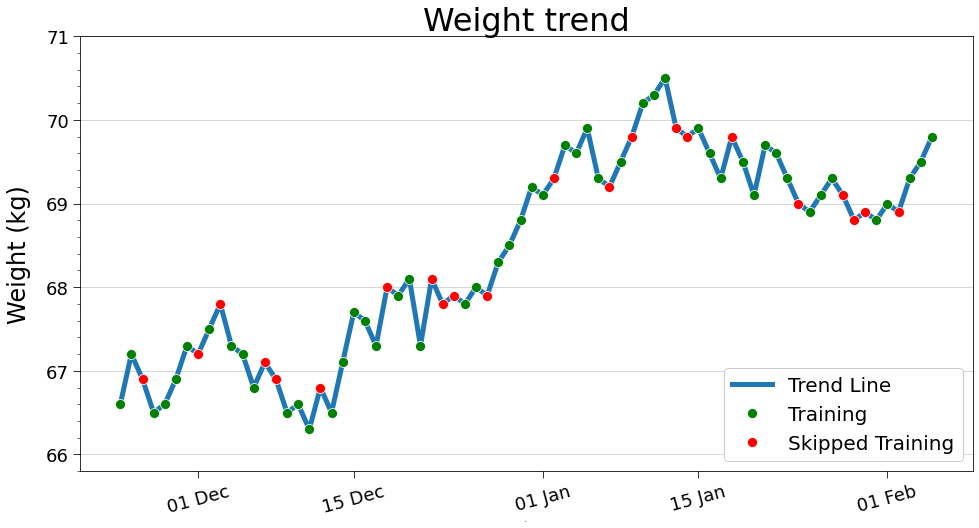

In [88]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1)
ax1.set_axisbelow(True)
ax1.grid(axis='y', linewidth = .5)

sns.lineplot(x = 'Date', y = 'Weight', data = df, dashes = False, linewidth = 5, ax = ax1, zorder = 1, label='Trend Line')
sns.lineplot(x = 'Date', y = 'Weight', data = df_y, marker="o", markersize = 10, dashes = False, ax = ax1, linewidth = 0, color = 'g', zorder = 2, label='Training')
sns.lineplot(x = 'Date', y = 'Weight', data = df_n, marker="o", markersize = 10, dashes = False, ax = ax1, linewidth = 0, color = 'r', zorder = 3, label='Skipped Training')

weight_trend_settings(df, ax1)

plt.show()